In [1]:
import os
import random

import pandas as pd
from bertopic import BERTopic
from nltk.tokenize import word_tokenize
from utils.filemanagement import load_from_file
from utils.filemanagement import get_project_root
from utils.config import random_sample,seed

In [2]:
model_type="bertopic"
model_name="BERTopic"
experiment="embedding"
embedding_model = "distiluse-base-multilingual-cased-v2"
data_type="np_mini_stopwords"
file_name_data = f"{data_type}.csv"
file_name = f"{model_type}_{embedding_model}_{data_type}"
folder_path_topics = f"preprocessed_data/results/embedding/{model_type}"
folder_path_data =f"preprocessed_data"
df = load_from_file(folder_path_data,file_name_data)
TOPN = 20
folder_path_word_cloud = f"preprocessed_data/wordclouds/{experiment}/{model_type}/{file_name}"

folder_name = f"Embedding-experiment/models/{model_type}"

ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)



In [3]:
data = df.text.values.tolist()
timestamps = df.date.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))

In [4]:
from sentence_transformers import SentenceTransformer

emb_model = SentenceTransformer("distiluse-base-multilingual-cased-v2")

In [5]:
topic_model = BERTopic(embedding_model=emb_model)
try:
    topic_model = topic_model.load(file_path)
except:
    print("correctly")
    topics,probs = topic_model.fit_transform(documents=new_data)

In [6]:
topic_model.get_topic_info()

Topic  Count                                               Name
0      -1   1490  -1_norge_fremskrittspartiet_regjeringen_statsr...
1       0    287                    0_regjeringen_energi_norge_olje
2       1    222                1_barn_barnevernet_barna_foreldrene
3       2    159     2_pasienter_sykehus_behandling_helseforetakene
4       3    149                     3_skolen_lærere_elever_elevene
5       4    102                4_statsråden_stortinget_svaret_svar
6       5     86  5_arbeiderpartiet_arbeidarpartiet_sv_fremskrit...
7       6     70            6_kommunane_kommunene_kommunar_kommuner
8       7     67             7_vegne_representantene_forslag_fremme
9       8     63    8_folkeparti_kristelig_kristeleg_representanten
10      9     58                   9_kvinner_menn_vold_likestilling
11     10     58     10_fiskerinæringen_fisk_statsråden_mattilsynet
12     11     55          11_politiet_politi_politiets_kriminalitet
13     12     55                  12_mat_landbruk_landbruket_bønder
14     13     52         13_jernbane_jernbanen_bergen_transportplan
15     14     52      14_skatt_skatte_finansministeren_skattesystem
16     15     47              15_afghanistan_irak_militære_soldater
17     16     42        16_saksordføreren_saken_stortinget_komiteen
18     17     38      17_regjering_ønsker_stortinget_representanten
19     18     37                    18_kirken_kirke_fondet_bønnerop
20     19     35  19_statsministeren_regjeringen_statsminister_s...
21     20     31     20_pensjonistene_pensjonsreformen_pensjon_jobb
22     21     31             21_forskning_forskningen_pst_utdanning
23     22     28  22_finansministeren_sentralbanksjefen_bank_øko...
24     23     26                           23_verden_eu_uhjelp_land
25     24     26                       24_stemme_nr_forslag_stemmer
26     25     24                  25_alkohol_vin_øl_alkoholpolitikk
27     26     24                      26_trafikken_milliarder_e6_kr
28     27     23   27_kultur_kulturen_kulturløftet_kulturministeren
29     28     22             28_skolen_skolesekken_kulturelle_skole
30     29     21  29_lokalpolitikerne_politiske_lokaldemokratiet...
31     30     15         30_avfall_forbrenningsanlegg_svenske_ulven
32     31     14  31_regjeringen_fleirtalet_stortinget_parlament...
33     32     14    32_president_presidenten_spanskekongen_minutter
34     33     13                   33_dyr_reintallet_løsdrift_ulver
35     34     12           34_statsråden_motsegn_svaret_mattilsynet
36     35     11                  35_usa_nato_tryggingsrådet_angrep
37     36     11                      36_motsegner_gjeld_seie_talet
38     37     10  37_utenriksministeren_utenrikstjeneste_norge_f...
39     38     10                            38_eu_europa_felles_usa
40     39     10  39_arbeidsvilkår_sykmeldte_arbeidstakere_medbo...

In [7]:
topics = topic_model.get_topics()

In [8]:
topic_model.visualize_topics()

In [9]:
erk = topic_model.get_representative_docs(0)

In [10]:
print(erk)

['takke saksordføreren komiteen samarbeid framtidsrettet lov havenergiloven virkelig fremskrittspartiet enig regjeringen lovverk regulerer arealer energiformer havs lovforslaget fornybar energiproduksjon havs staten rettslige rammeverket konsesjoner måte regulere forhold knyttet planlegging utbygging drift nedlegging anlegg produksjon fornybar energi lovforslaget omhandler anlegg omforming overføring elektrisitet produksjonssted konsument lovforslaget trekk basert arealvurderinger tilhørende prosedyrer konsekvensutredninger regjeringen skriver proposisjonen ønsker norge utvikles miljø klimavennlig nasjon ledende utviklingen miljøvennlig energi eu pådriver fornybar energi 2020målsettinger 2020 eulandene produsere 20 pst fornybar energi fornybare energien vindmøller vindmøller havs regjeringen skriver norge bygger vindmøller skala havs særdeleshet flytende vindmøller kostbare teknisk vanskelige strømprisen vindmøller havs norges høy betydning leverandørindustri forbereder levere utstyr b

In [11]:
for item in erk:
    print(len(item))

3234
2896
2212


In [12]:
ark = "først vil jeg takke komiteen for et godt samarbeid om budsjettet. jeg vil rette en spesiell takk til kristelig folkeparti og venstre, som gjennom budsjettforliket her på stortinget har vært med på å styrke utdannings- og forskningsbudsjettet ytterligere. et av regjeringens hovedprosjekter er å videreutvikle kunnskapssamfunnet, dette fordi kunnskap gir framtidsmuligheter for den enkelte, uansett bakgrunn, og danner grunnlaget for sosial mobilitet i samfunnet. kunnskap er avgjørende for å styrke norsk konkurransekraft og for å bygge landet for framtiden. dette budsjettet følger opp regjeringens ambisjoner gjennom en historisk satsing på skolen, utdanningsinstitusjonene, studentene og forskningsmiljøene. ingenting betyr mer for elevenes læring enn lærerens kompetanse og evne til å lære bort. fremskrittspartiet er glad for at regjeringen fortsetter den store satsingen på videreutdanning av lærerne. satsingen sikrer at totalt 5 050 lærere og 500 skoleledere får tilbud om videreutdanning innen strategien kompetanse for kvalitet fra høsten 2015. jeg er trygg på at den satsingen vil gi målbare resultater. det arbeider i dag mange lærere i den norske skolen som ikke har kompetanse til å undervise i det faget de underviser i. fremskrittspartiet er derfor positiv til at det i budsjettforliket ble bevilget 50 mill. kr til et kompetanseløft for ufaglærte med jobb i skolen. vi ser på dette som et godt tiltak for at flere kan kvalifisere seg til yrket. tidlig innsats er et av de viktigste tiltakene for at flere skal lykkes i skolen. for å ivareta tidlig innsats ble det i budsjettforliket satt av 200 mill. kr til å styrke lærertettheten i 1.–4. klasse fra høsten 2015. det er en forutsetning at stillingene skal besettes av lærere med formell kompetanse. fremskrittspartiet forventer at dette vil forsterke trykket på tidlig innsats og individuell tilpasning. internasjonale undersøkelser viser at norske elever presterer under eller om lag på gjennomsnittet for oecd i både matematikk og naturfag. matematikk er det faget flest elever får karakter 1 og 2 i på ungdomsskolen, og som flest elever stryker i på videregående skole. dette tyder på at vi har et realfagsproblem i skolen. gode realfagskunnskaper har bidratt til at norge bl.a. er verdensledende innen maritim sektor, olje og gass. fremskrittspartiet mener at behovet for realfagskunnskaper vil være av vital betydning for det som vi også skal leve av i framtiden. fremskrittspartiet er positiv til at regjeringen er på gang med en ny realfagsstrategi i 2015. strategien innebærer bl.a. oppretting av realfagskommuner og har til hensikt å stimulere kommuner til å ta helhetlig ansvar for å forbedre realfagskunnskapene til barn og unge. ekspertgruppen for realfag som departementet opprettet, har nå levert sin rapport og kommet med en mengde konkrete forslag til hvordan elevene skal bli bedre i matematikk og naturfag. samarbeidsavtalen mellom regjeringspartiene og kristelig folkeparti og venstre viderefører regjeringens satsing på yrkesfagløftet, som ble startet i 2014. avtalen gjør at lærlingtilskuddet økes til 7 500 kr totalt per lærekontrakt. før fremskrittspartiet tiltrådte regjeringskontorene, hadde dette tilskuddet stått på stedet hvil i fem år. ssb-prognoser viser at vi vil mangle ca. 134 000 fagarbeidere i 2030. regjeringens yrkesfagløft, som startet i 2014, innebar styrking av praksisbrevordningen, vekslingsmodellen, hospiteringsordningen for lærerne, tilskudd til nye lærebedrifter og yrkesretting av fellesfag. disse tilbudene videreføres neste år. i tillegg videreføres ordningen med at yrkesfaglærere kan hospitere i bedrift, og at folk fra yrkeslivet kan hospitere i skolen. det er bevilget 8 mill. kr til kompetanseheving for yrkesfaglærere i budsjettet for 2015. dette er en ny og viktig satsing. for at elevene på videregående yrkesfag skal få fullføre sin utdanning i bedrift, er det behov for langt flere læreplasser. den foreslåtte økningen i lærlingtilskuddet vil forhåpentligvis gi flere plasser, men fremskrittspartiet er opptatt av å minne om at statsråden nøye må følge opp den inngåtte samfunnskontrakten slik at forpliktelsen til å øke antall læreplasser blir innfridd. jeg må også legge til at fremskrittspartiet har forventninger om en enda større satsing på yrkesfagløftet neste år. mennesker er norges viktigste ressurs, og den menneskelige kapitalen utgjør ca. 80 pst. av nasjonalformuen. av ulike grunner må mange skifte yrke, innholdet i etablerte yrker endres, og stadig utvikling av nye arbeidsmetoder krever at mange må tilegne seg nye ferdigheter i voksen alder. fremskrittspartiet mener at det er stort behov for gode og oversiktlige utdanningstilbud til voksne. derfor er fremskrittspartiet svært positiv til at regjeringen har satt i gang en rekke tiltak som vil styrke voksnes læring, bl.a. ved å utarbeide en rettleder for realkompetansevurdering ved opptak til fagskoler og til realkompetansevurdering for fritak til høyere utdanning. den har satt i gang lokale tilbud om etterutdanning for lærere og andre som underviser i voksenopplæringen. det foreslås å utvikle et kartleggingsverktøy som har til hensikt å øke voksnes deltaking i og gjennomføring av opplæring, og å gjøre opplæringstilbyderne i stand til å gi bedre tilpasset og tilrettelagt opplæring. det skal også utvikles et helhetlig system for karriereveiledning for voksne. regjeringen legger med dette budsjettet fram en sterkere satsing på høyere utdanning og på studentvelferd enn i noe tidligere statsbudsjett. regjeringen øker studiefinansieringen med 3,1 pst., noe som er godt over forventet prisvekst. i budsjettforliket legger vi opp til bygging av 2 000 hybelenheter i 2015. det er så mye som en dobling sammenlignet med de rød-grønnes siste budsjett. videre blir frikortgrensen økt fra 40 000 til 50 000 kr, noe som kommer våre studenter til gode. alt i alt legger regjeringens budsjett opp til at studentene kan bruke mer tid på studiene. fremskrittspartiet mener det er samfunnsøkonomisk klokt. høyre–fremskrittsparti-regjeringen la sammen med budsjettet fram meld. st. 7 for 2014–2015, langtidsplan for forskning og høyere utdanning 2015–2024. planen inneholder en rekke store og forpliktende opptrappinger over tid, men startskuddet går allerede i 2015. regjeringen bevilger 100 mill. kr til å utvikle flere verdensledende fagmiljøer. eu er vår største forskningspartner, og vi har i dag verdens største forskningssamarbeid gjennom horisont 2020. det er viktig for norge å delta i de store forskningssamarbeidene, bl.a. for å få tilgang til sterke fagmiljøer og kontakt med verdensledende forskere. i dag klarer vi ikke å tilbakeføre en tilfredsstillende andel av midlene vi bidrar med inn i prosjektet. derfor er jeg fornøyd med at regjeringen bevilger 115 mill. kr til stimuleringsordninger, deriblant gjennom stim-eu, for å legge til rette for større deltagelse i horisont 2020. budsjettforliket, som regjeringspartiene har inngått med kristelig folkeparti og venstre, viderefører de viktigste satsingene i regjeringens forslag til statsbudsjett for 2015, og trygger dermed vekst og verdiskaping i hele landet. budsjettforliket resulterte bl.a. i 100 nye rekrutteringsstillinger utover regjeringens forslag til statsbudsjett. dette gir sektoren nærmere 150 nye rekrutteringsstillinger neste år. fremskrittspartiet er godt fornøyd med at det blir lagt til rette for økt forskningsinnsats ved norske utdanningsinstitusjoner. regjeringens kunnskapssatsing er viktig for å gi alle muligheter til aktiv deltagelse i samfunnet, men også for å styrke vår konkurransekraft. konkurransen om kunnskapen er global, og vi konkurrerer i realiteten mot alle andre verdens land. norge kan aldri konkurrere mot lavkostland på pris, men vi kan konkurrere på smarte løsninger og god kvalitet. ifølge nifu har offentlige bevilgninger til forskning aldri tidligere utgjort en høyere andel av bruttonasjonalproduktet. dette budsjettet viser med all tydelighet at regjeringen og stortingsflertallet prioriterer å satse på utdanning og forskning. det gleder fremskrittspartiet, og det ruster landet for framtiden. tro, religion og livssyn spiller en viktig rolle i det norske samfunnet, både for fellesskapet og for enkeltmennesker, og den norske kirke står sterkt i befolkningen. fremskrittspartiet ser fram til at den norske kirke skal bli et eget rettssubjekt og på lik linje med andre trossamfunn få være herre i eget hus. kirkebyggene våre er blant de viktigste historiske bygningene norge har, og for fremskrittspartiet er det av stor betydning at disse sikres og ivaretas på en best mulig måte. fremskrittspartiet er derfor glad for at regjeringspartiene sammen med kristelig folkeparti og venstre styrket bevilgningen til sikring av kirkebygg med 2 mill. kr og ga 1 mill. kr til videreføring av rentekompensasjonsordningen til kirkebygg. dette gir en låneramme på 500 mill. kr. fremskrittspartiet er også glad for at regjeringen følger opp punktet i regjeringsplattformen som viser til at «regjeringen vil bidra til et nasjonalt løft i sikringsarbeidet av fredede og verneverdige kirker»."

In [13]:
ark2 = ark.split(" ")
print(" ".join(ark2[0:205]))

først vil jeg takke komiteen for et godt samarbeid om budsjettet. jeg vil rette en spesiell takk til kristelig folkeparti og venstre, som gjennom budsjettforliket her på stortinget har vært med på å styrke utdannings- og forskningsbudsjettet ytterligere. et av regjeringens hovedprosjekter er å videreutvikle kunnskapssamfunnet, dette fordi kunnskap gir framtidsmuligheter for den enkelte, uansett bakgrunn, og danner grunnlaget for sosial mobilitet i samfunnet. kunnskap er avgjørende for å styrke norsk konkurransekraft og for å bygge landet for framtiden. dette budsjettet følger opp regjeringens ambisjoner gjennom en historisk satsing på skolen, utdanningsinstitusjonene, studentene og forskningsmiljøene. ingenting betyr mer for elevenes læring enn lærerens kompetanse og evne til å lære bort. fremskrittspartiet er glad for at regjeringen fortsetter den store satsingen på videreutdanning av lærerne. satsingen sikrer at totalt 5 050 lærere og 500 skoleledere får tilbud om videreutdanning inn

In [14]:
topic_model.save(file_path)

In [15]:
topics

{-1: [('norge', 0.010228818337898887),
  ('fremskrittspartiet', 0.010085713666863236),
  ('regjeringen', 0.009746222166226228),
  ('statsråden', 0.008949827640584874),
  ('representanten', 0.008631876797460324),
  ('gjelder', 0.007961962677633574),
  ('sv', 0.007698272846053022),
  ('stortinget', 0.007529005922101973),
  ('folk', 0.007450875245102854),
  ('kr', 0.007398390657961253)],
 0: [('regjeringen', 0.01677497654327843),
  ('energi', 0.01493609340798412),
  ('norge', 0.014452415906974814),
  ('olje', 0.012629162464975184),
  ('gasskraftverk', 0.010987093406963177),
  ('fornybar', 0.010785727830656594),
  ('fremskrittspartiet', 0.00957342659684718),
  ('kraft', 0.009565690449400038),
  ('gass', 0.009188960461398235),
  ('industri', 0.009044985707121884)],
 1: [('barn', 0.05245694811345669),
  ('barnevernet', 0.028142988513552156),
  ('barna', 0.023337812122726665),
  ('foreldrene', 0.016421126787758675),
  ('barnet', 0.015227992592049992),
  ('foreldre', 0.014263781471395337),
  (

In [16]:
NUM_TOPICS = len(topic_model.topic_sizes_.keys())-1

In [17]:
formatted_topics = [dict(topics[i]) for i in range(NUM_TOPICS)]

In [18]:
print(formatted_topics)

[{'regjeringen': 0.01677497654327843, 'energi': 0.01493609340798412, 'norge': 0.014452415906974814, 'olje': 0.012629162464975184, 'gasskraftverk': 0.010987093406963177, 'fornybar': 0.010785727830656594, 'fremskrittspartiet': 0.00957342659684718, 'kraft': 0.009565690449400038, 'gass': 0.009188960461398235, 'industri': 0.009044985707121884}, {'barn': 0.05245694811345669, 'barnevernet': 0.028142988513552156, 'barna': 0.023337812122726665, 'foreldrene': 0.016421126787758675, 'barnet': 0.015227992592049992, 'foreldre': 0.014263781471395337, 'barns': 0.011061272342467905, 'ønsker': 0.009340416529298233, 'barnehagene': 0.009324648288008877, 'gjelder': 0.009123743053628836}, {'pasienter': 0.01972456703136757, 'sykehus': 0.019321950075066995, 'behandling': 0.018699714400176443, 'helseforetakene': 0.015982834305165113, 'helse': 0.01569209908169375, 'pasientene': 0.015458160980774013, 'helseministeren': 0.014988261238917038, 'sykehusene': 0.013422565263599189, 'gjelder': 0.012307355686963905, 'he

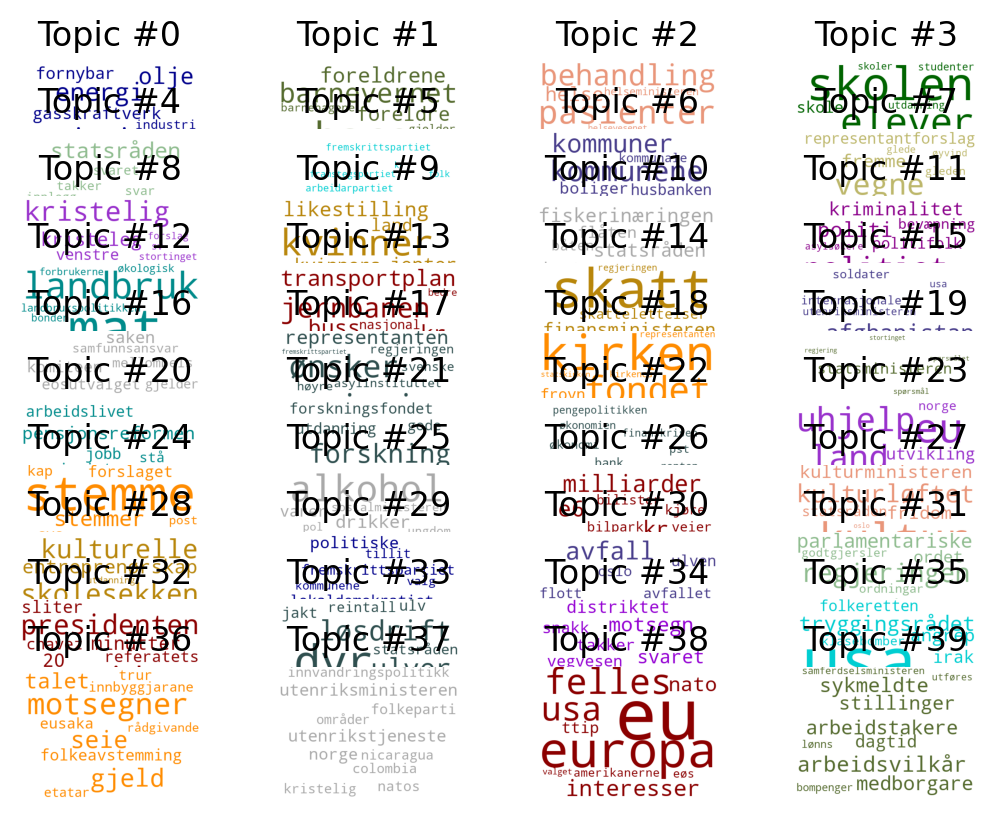

In [19]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(formatted_topics, f"{model_name}-{embedding_model}: {data_type}", NUM_TOPICS, dpi=200)

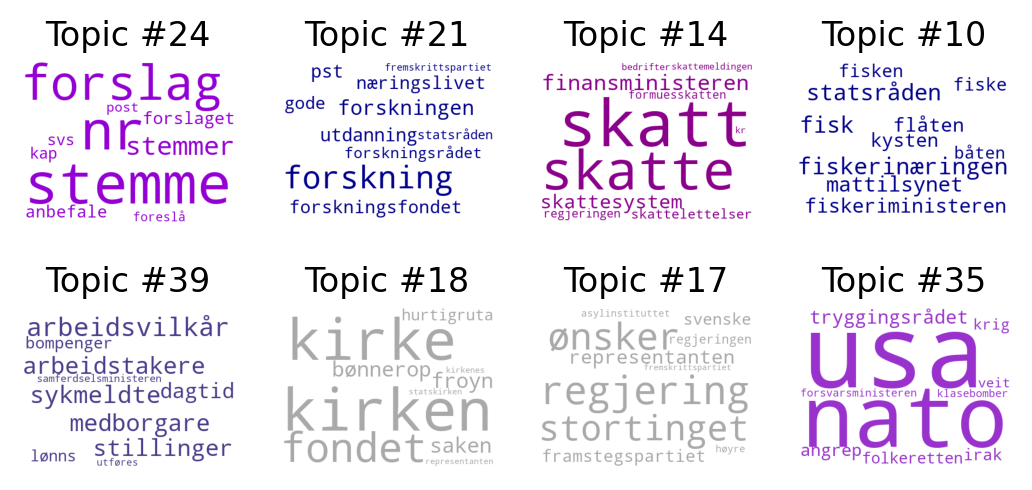

In [20]:
from utils.filemanagement import make_excerpt_wordcloud


excerpt_wordcloud = make_excerpt_wordcloud(formatted_topics,NUM_TOPICS,f"Sample from {model_name}-{embedding_model}: {data_type}",random_sample=random_sample,seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

In [21]:
from utils.tables_and_plots import create_wordcloud


wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(NUM_TOPICS):
    topic_wordcloud = create_wordcloud(dict(topics[i]))
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [22]:
from utils.filemanagement import write_topics_file
topic_words_numbered = []
for i, key in enumerate(topics.keys()):
    if key == -1:
        continue
    r = topics[key]
    rr = []
    for item in r:
        rr.append(item[0])
    topic_words_numbered.append((i,rr))


write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [23]:
from utils.filemanagement import load_model_topics


loaded_topics = load_model_topics(folder_path_topics, file_name)


In [24]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [25]:
from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [26]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [27]:
from utils.stats import compute_metrics

coherence, diversity = compute_metrics(
    loaded_topics.values(), word_frequencies, word_co_frequencies, 10)

10
('energi', 'regjeringen') wordtuple
('energi', 'regjeringen') wordup
324.0 over
378276.0 under
-10.189229717991413 -8.339850002884624 1.2217521555504136 ('energi', 'regjeringen') 324 2174 174
('norge', 'regjeringen') wordtuple
('norge', 'regjeringen') wordup
2675.0 over
4384958.0 under
-10.6788084174644 -11.385323176175872 0.9379451292002079 ('norge', 'regjeringen') 2675 2174 2017
('olje', 'regjeringen') wordtuple
('olje', 'regjeringen') wordup
215.0 over
286968.0 under
-10.382337494796301 -7.74819284958946 1.339968905826397 ('olje', 'regjeringen') 215 2174 132
('gasskraftverk', 'regjeringen') wordtuple
('gasskraftverk', 'regjeringen') wordup
193.0 over
226096.0 under
-10.194118905900321 -7.592457037268081 1.3426640224451465 ('gasskraftverk', 'regjeringen') 193 2174 104
('fornybar', 'regjeringen') wordtuple
('fornybar', 'regjeringen') wordup
177.0 over
191312.0 under
-10.07796229358161 -7.467605550082998 1.3495573950701776 ('fornybar', 'regjeringen') 177 2174 88
('fremskrittspartiet

In [28]:
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.041709956205776264


In [29]:
print(diversity)

0.815


In [30]:
print(coherence)

1.4634847282693857


In [31]:
from tabulate import tabulate
import csv

In [32]:
# Check the stats for the dataset after running basic pipeline

models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒═════════════════════════════════════════════════════════════════╤═══════════╤═════════╕
│ Model                                                           │ Metric    │   Value │
╞═════════════════════════════════════════════════════════════════╪═══════════╪═════════╡
│ bertopic_distiluse-base-multilingual-cased-v2_np_mini_stopwords │ coherence │ 1.46348 │
├─────────────────────────────────────────────────────────────────┼───────────┼─────────┤
│ bertopic_distiluse-base-multilingual-cased-v2_np_mini_stopwords │ diversity │ 0.815   │
╘═════════════════════════════════════════════════════════════════╧═══════════╧═════════╛


In [33]:
# Save all topic stats to file

topic_stats_folder_path = f"preprocessed_data/metrics/{experiment}/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})